In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle

from config import ALL, TW0050, Tech, Fin, Slope

pd.set_option('display.max_columns', None)

In [2]:

stock_period = ('2010/01/01','2021/12/31')

# experiments
Portfolio = TW0050
# Portfolio = Slope


In [16]:
stock_df=[]
for stock in Portfolio['portfolio']: 
    try:
        print(f'Start Download {stock}')
        df = pdr.DataReader(str(stock)+'.TW', 'yahoo', start=stock_period[0], end=stock_period[1])
        df[stock] = df['Adj Close']
        df['date'] = df.index
        stock_df.append(df[['date',stock]])
    except:
        print(f'  {stock} Download Fail')
    
df = pd.concat(stock_df,axis=1).drop(columns='date')
df.index = df.index.to_series().apply(lambda x : str(x).replace('-','')[:8])
df.index.name = 'DateTime'
name = Portfolio['name']
df = df.dropna()
output_path = os.path.join('data',f'{name}.csv')
print(output_path)
df.to_csv(output_path)
df


Start Download 1101
Start Download 1216
Start Download 1301
Start Download 1303
Start Download 1326
Start Download 1402
Start Download 1590
Start Download 2002
Start Download 2207
Start Download 2303
Start Download 2308
Start Download 2317
Start Download 2324
Start Download 2327
Start Download 2330
Start Download 2357
Start Download 2379
Start Download 2382
Start Download 2395
Start Download 2408
Start Download 2409
Start Download 2412
Start Download 2603
Start Download 2609
Start Download 2615
Start Download 2801
Start Download 2880
Start Download 2881
Start Download 2882
Start Download 2884
Start Download 2885
Start Download 2886
Start Download 2887
Start Download 2891
Start Download 2892
Start Download 2912
Start Download 3008
Start Download 3034
Start Download 3045
Start Download 4904
Start Download 4938
Start Download 5880
Start Download 6415
Start Download 6505
Start Download 8046
Start Download 8454
Start Download 9910
data\TW0050.csv


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,2308,2317,2324,2327,2330,2357,2379,2382,2395,2408,2409,2412,2603,2609,2615,2801,2880,2881,2882,2884,2885,2886,2887,2891,2892,2912,3008,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20140227,22.179380,32.798717,51.435349,41.028740,51.098499,20.793091,256.414795,17.947668,282.791260,8.401972,126.542503,57.358025,12.507071,27.830408,82.955574,152.615601,63.696304,44.006962,114.304123,30.585340,7.065485,62.496273,13.276930,21.765425,7.423027,10.517595,8.743021,25.492638,28.027988,7.684922,9.607795,13.774496,7.892887,10.957613,8.650025,136.476868,1126.979980,76.028748,59.064655,45.337418,23.731686,8.422073,45.368744,56.802368,30.348743,102.469368,37.756481
20140303,21.880899,32.377388,50.767353,40.586208,50.369473,20.793091,274.169800,17.877836,275.949493,8.538589,125.415977,56.743469,12.507071,27.830408,82.955574,151.044922,61.714638,43.711613,113.408798,29.750029,6.962588,62.292480,13.018770,21.430571,7.475487,10.517595,8.642528,25.251854,27.714478,7.604241,9.366088,13.603738,7.809805,10.789464,8.626064,134.299057,1156.306763,79.857529,58.027294,45.042057,23.789995,8.319364,48.497623,56.145267,29.688988,97.740013,38.499718
20140304,21.352821,32.215343,50.299767,40.522987,49.839264,20.466667,290.685974,17.738163,272.148560,8.470281,122.412003,56.538620,12.263031,27.543831,82.571526,150.783157,60.865353,43.534405,113.408798,27.693871,6.893991,62.020771,12.871248,21.179432,7.423027,10.428963,8.617403,25.041174,27.306915,7.543730,9.245235,13.489902,7.726721,10.761440,8.554180,135.024963,1156.306763,76.028748,57.767952,44.746704,23.585913,8.293687,51.822056,55.853233,29.853928,94.897141,38.202419
20140305,21.857941,32.409801,50.433361,40.649429,49.574169,20.531950,284.905334,17.703245,277.850006,8.504435,127.293465,56.675194,12.293538,28.021469,84.491814,148.165405,62.917789,46.546963,113.110329,25.766224,6.928290,62.428352,12.945008,21.263145,7.501716,10.399419,8.642528,25.131462,27.338257,7.584072,9.366088,13.489902,7.782110,10.817490,8.578143,136.476868,1164.685669,76.849197,57.962467,44.746704,24.081541,8.293687,55.439827,55.926239,30.018869,94.587105,38.797012
20140306,21.651299,32.798717,50.433361,40.459766,49.110237,20.629877,282.427856,17.842916,282.031067,8.675206,128.795486,57.631153,12.385052,28.244364,86.796143,148.950745,64.757912,46.487888,116.094803,27.051323,6.996886,62.700062,13.203171,21.430571,7.449258,10.428963,8.717897,25.281954,27.902588,7.523561,9.366088,13.575280,7.837498,11.041686,8.673986,143.736267,1164.685669,76.849197,58.156967,44.746704,24.198154,8.345041,59.253155,55.926239,30.060101,93.536140,38.598816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211224,42.397678,65.799995,96.066978,77.906830,75.664787,27.534645,984.000000,32.029072,590.258911,60.387222,264.195984,98.898117,22.156298,456.054504,597.776123,321.285278,564.000000,83.439713,387.355499,70.791016,20.958307,111.421654,115.940102,97.576302,157.093079,16.123993,19.590034,70.754051,56.797180,25.547266,22.709280,33.298126,18.750000,24.472069,22.827532,265.816345,2367.433838,439.168060,95.826485,61.397892,63.556366,23.441442,1193.578491,92.907516,547.414490,1339.570679,222.200287
20211227,42.574707,65.703941,96.528839,77.906830,75.947113,27.629921,1025.000000,31.758787,595.097107,60.387222,269.079468,99.373589,22.248425,464.250000,599.755493,323.456116,576.000000,84.269501,388.331207,71.632652,21.191696,111.903999,116.357147,97.576302,157.093079,16.172125,19.590034,70.754051,56.983097,25.547266,22.709280,33.391922,18.750000,24.424732,22.874695,265.332153,2372.275146,439.996704,95.922501,61.493977,63.833908,23.394653,1250.770752,93.195450,556.103638,1351.711792,223.665344
20211228,42.618961,65.992111,96.990700,77.997520,76.229446,27.772835,1025.000000,31.893932,595.097107,60.762878,271.032837,1

In [40]:


output_path = os.path.join('data',f'{name}.csv')
print(output_path)
df = pd.read_csv(output_path,index_col=['DateTime'])
df.index = pd.to_datetime(df.index,format='%Y%m%d')
# test
slope_df_test = df[df.index>='2020/01/01']
slope_df_test = slope_df_test.reset_index(drop=True)
slopes_test = slope_df_test.apply(lambda x: np.polyfit(slope_df_test.index, x, 1)[0])

slope_df_train = df[df.index<'2020/01/01']
slope_df_train = slope_df_train.reset_index(drop=True)
slopes_train = slope_df_train.apply(lambda x: np.polyfit(slope_df_train.index, x, 1)[0])

slope_df = pd.concat([slopes_train, slopes_test],axis=1)
slope_df.index.name = 'code'
slope_df.index = slope_df.index.map(str)

# display(slope_df)
slope_df['diff']=slope_df[1]-slope_df[0]
slope_df = slope_df.sort_values(by='diff',ascending=False)
# display(slope_df)
# slope_df_10 = slope_df.index[:10]
# display(slope_df_10)
output_path = f'data/{name}_table.csv'
stock_code = pd.read_csv(output_path,index_col='code')
stock_code.index = stock_code.index.map(str)
# display(stock_code)
# pd.concat([slope_df, stock_code], axis=1)
# pd.merge(slope_df,stock_code, on=[slope_df.index, stock_code.index])
slope_df.join(stock_code)

data\TW0050.csv


,0,1,diff,name,c_name
code,,,,,
8454,0.015152,2.824594,2.809443,富邦媒,貿易百貨
6415,0.091716,2.023945,1.932229,矽力*-KY,電子工業
8046,0.000202,1.112374,1.112172,南電,電子零組件業
1590,0.163763,1.225783,1.062019,亞德客-KY,電機機械
2379,0.092032,0.783464,0.691432,瑞昱,電子工業
2330,0.126901,0.809662,0.682761,台積電,電子工業
3034,0.039341,0.678297,0.638956,聯詠,電子工業
2357,-0.001876,0.402433,0.404308,華碩,電腦及週邊設備業
2615,-0.000251,0.383846,0.384097,萬海,航運業


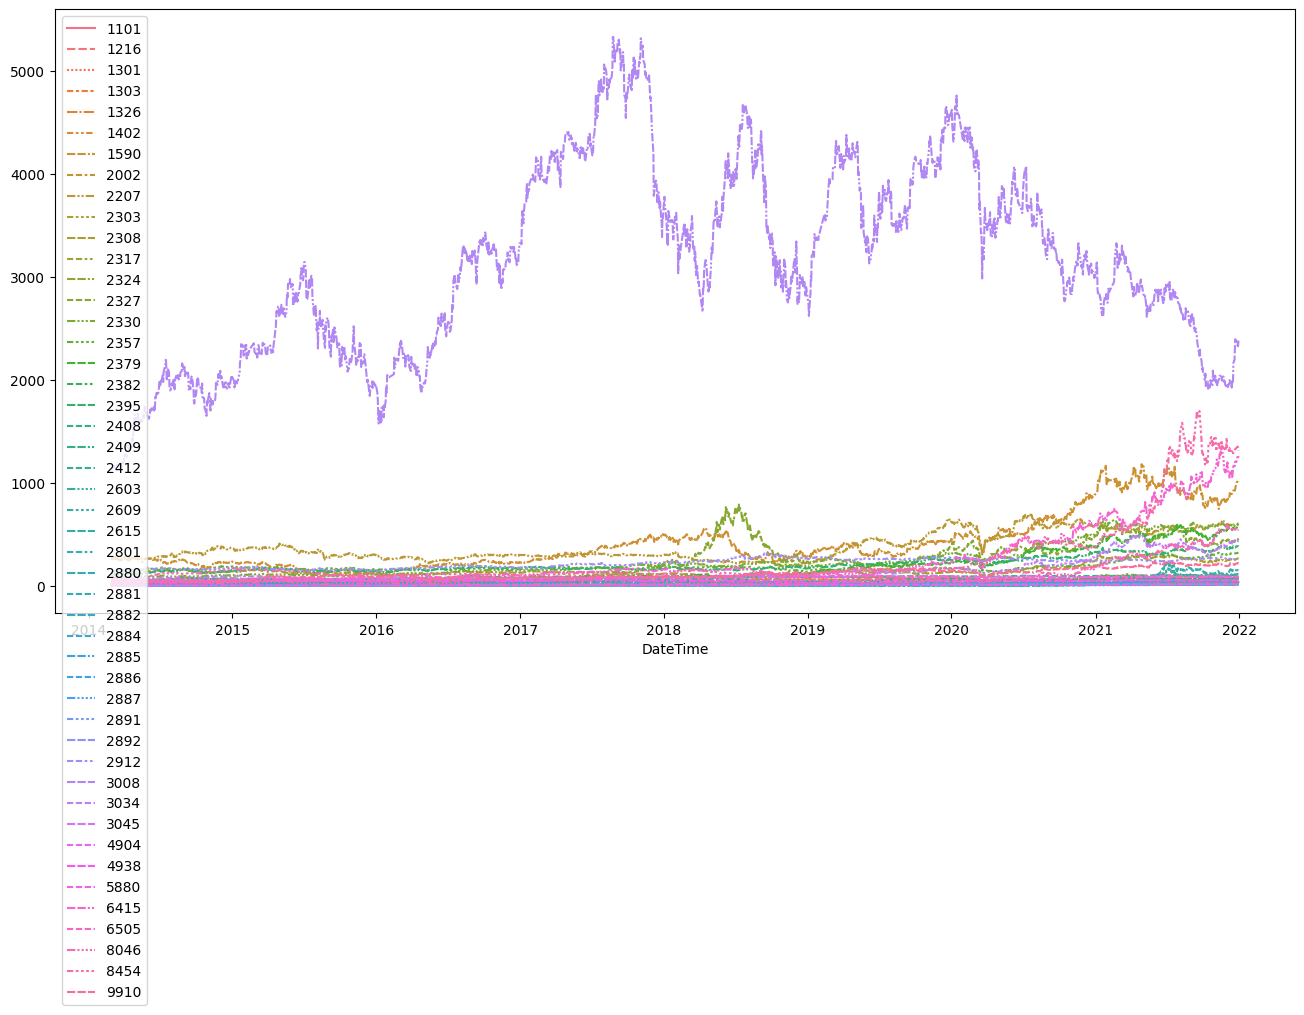

In [24]:
df = pd.read_csv(f'data/{name}.csv',index_col=0) 
# df = df[slope_df_10]
df.index = pd.to_datetime(df.index,format='%Y%m%d')
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=df, ax=ax)
plt.legend(loc='upper left')

### Read Data & Output Train/Test Data

In [6]:

name = Portfolio['name']
print(name)
train_year = ('2015','2020')
test_year = ('2021','2021')
data = pd.read_csv(f'data/{name}.csv',index_col=0)
data = pd.DataFrame(data, index=data.index, columns=data.columns)
# data = data[slope_df_10]
print('stock', slope_df_10)
display(data.head())
display(data.describe())

scalerfile = f'scaler/{name}_{train_year[0]}_{train_year[1]}_scaler.sav'
print(scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(data)
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# portfolio_stock = []
# data = data[portfolio_stock]

train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{name}_{train_year[0]}_{train_year[1]}.csv'
print('Train Data:',output_path)
train.to_csv(output_path)
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
output_path = f'data/{name}_{test_year[0]}_{test_year[1]}.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

Slope
stock Index(['8454', '6415', '8046', '1590', '2379', '2330', '3034', '2357', '2615',
       '2308'],
      dtype='object')


,8454,6415,8046,1590,2379,2330,3034,2357,2615,2308
DateTime,,,,,,,,,,
20140227,102.469368,45.368752,30.348745,256.414825,63.696304,82.955589,76.028740,152.615601,7.423027,126.542488
20140303,97.740005,48.497620,29.688988,274.169800,61.714630,82.955589,79.857521,151.044952,7.475487,125.416008
20140304,94.897133,51.822060,29.853922,290.686005,60.865356,82.571533,76.028740,150.783157,7.423027,122.412025
20140305,94.587105,55.439823,30.018869,284.905334,62.917793,84.491806,76.849182,148.165390,7.501717,127.293480
20140306,93.536133,59.253155,30.060099,282.427856,64.757896,86.796112,76.849182,148.950745,7.449257,128.795471


,8454,6415,8046,1590,2379,2330,3034,2357,2615,2308
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,268.050277,248.410226,81.958793,412.131387,177.871078,243.120055,143.651163,186.649971,24.994932,152.763041
std,327.075544,277.466334,119.971922,257.423827,147.141595,156.148766,105.295657,41.875414,39.409150,50.180512
min,89.600258,44.781143,18.678083,117.641846,37.590923,82.571533,62.420105,129.299179,7.396798,89.203415
25%,117.114510,89.948502,25.012432,228.679123,76.368149,118.983200,78.940987,163.978134,10.666224,125.040520
50%,131.662659,135.642487,33.812462,319.317841,100.599472,198.838913,95.008621,174.041992,11.747768,137.781693
75%,178.889450,242.993408,48.437550,489.085388,220.952805,284.108948,157.414902,185.686340,14.487123,150.909393
max,1699.757446,1330.342651,604.376526,1184.116943,597.282043,654.600647,505.132690,329.245026,239.872574,309.839050


scaler/Slope_2015_2020_scaler.sav
Train Data: data/Slope_2015_2020.csv
Test Data: data/Slope_2021_2021.csv


In [7]:
# portfolio_stock


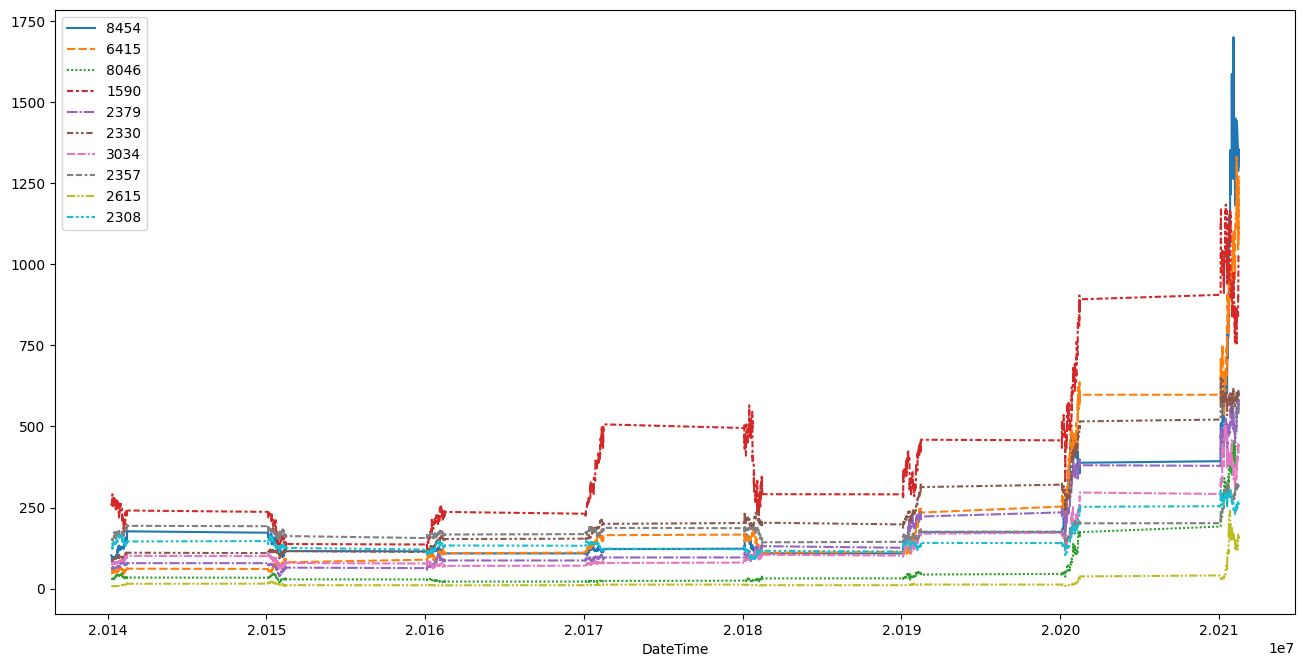

In [8]:

portfolio_stock = Portfolio['portfolio']
# portfolio_stock = ['1101','1216']
data_plot = data[slope_df_10]
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=data_plot, ax=ax)
plt.legend(loc='upper left')

In [25]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {"dataset": "TaiwanStockInfo"}
translation = requests.get(url, params=parameter)
trans = translation.json()
df_info = pd.DataFrame(trans['data'])
drop_list = ['ETF', '上櫃指數股票型基金(ETF)','受益證券', '指數投資證券(ETN)', '其他', '所有證券 ', '存託憑證','Index', '大盤']
df_info = df_info[df_info['industry_category'].apply(lambda x : x not in drop_list)]
df_info['row'] = df_info.sort_values(['stock_id','industry_category'], ascending=[True,False]).groupby(['stock_id']).cumcount() + 1
df_info = df_info[df_info['row']==1]
df_info = df_info[['stock_id','stock_name','industry_category']]
df_info = df_info.rename(columns={'stock_id':'code','stock_name':'name','industry_category':'c_name'})
df_info = df_info[df_info['code'].apply(lambda x : x in Portfolio['portfolio'])]

output_path = f'data/{name}_table.csv'
df_info.to_csv(output_path,index=False)
df_info

,code,name,c_name
304,1101,台泥,水泥工業
318,1216,統一,食品工業
340,1301,台塑,塑膠工業
341,1303,南亞,塑膠工業
360,1326,台化,塑膠工業
368,1402,遠東新,紡織纖維
469,1590,亞德客-KY,電機機械
598,2002,中鋼,鋼鐵工業
651,2207,和泰車,汽車工業
673,2303,聯電,電子工業
